# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from sklearn.metrics import mean_absolute_percentage_error # library for evaluation  mape
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
import statsmodels.api as smapi

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

In [2]:
api_key = 'API' 
api_secret = 'SECRET_API'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data.head()

close
2021-01-01 03:59:59.999  29278.40000000
2021-01-01 07:59:59.999  29092.83000000
2021-01-01 11:59:59.999  29313.49000000
2021-01-01 15:59:59.999  29188.67000000
2021-01-01 19:59:59.999  29029.04000000

## Settings

In [3]:
cryptoTicker = "BTC"
cryptoPair = "USDT"

trainTestSplit = 0.8

# Loading dataset

In [4]:
api_key = 'API' 
api_secret = 'SECRET_API'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data = data.iloc[:-1 , :]

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [5]:
data.head() # showing the first 5 rows of data

close
2021-01-01 03:59:59.999  29278.40000000
2021-01-01 07:59:59.999  29092.83000000
2021-01-01 11:59:59.999  29313.49000000
2021-01-01 15:59:59.999  29188.67000000
2021-01-01 19:59:59.999  29029.04000000

### Five last records of data

In [6]:
data.tail() # showing the last 5 rows of data

close
2021-12-31 07:59:59.999  47191.09000000
2021-12-31 11:59:59.999  47975.76000000
2021-12-31 15:59:59.999  48005.37000000
2021-12-31 19:59:59.999  45728.28000000
2021-12-31 23:59:59.999  46216.93000000

### Coloumns/features in data

In [7]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [8]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Shape of data

In [9]:
data.shape #shape of data

(2190, 1)

### Data information

In [10]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2021-01-01 03:59:59.999000 to 2021-12-31 23:59:59.999000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2190 non-null   object
dtypes: object(1)
memory usage: 34.2+ KB


### Data types of all coloumns

In [11]:
data.dtypes #data types of data

close    object
dtype: object

### Checking missing Values

In [12]:
data[data.isnull().any(axis=1)].head() #checking the null values 

Empty DataFrame
Columns: [close]
Index: []

### Count of missing values

In [13]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [14]:
data.isnull().values.any() #checking the null values 

False

### Counts of missing values in each column

In [15]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

### Data Description

In [16]:
data.describe() # statics of data 

close
count             2190
unique            2188
top     38700.00000000
freq                 2

In [17]:
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [18]:
data['date'] = data.index # taking dates in date column 
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

### Close price with respect to year 

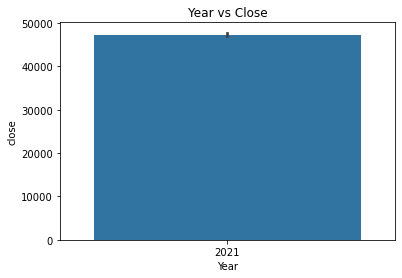

In [19]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

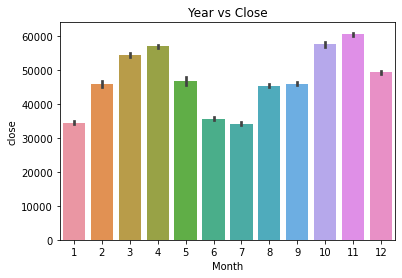

In [20]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Hour 

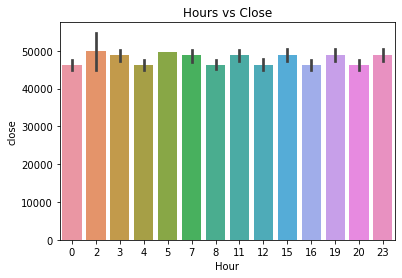

In [21]:
sns.barplot(x='Hour', y='close', data=data).set(title='Hours vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

### Close price with respect to Minutes 

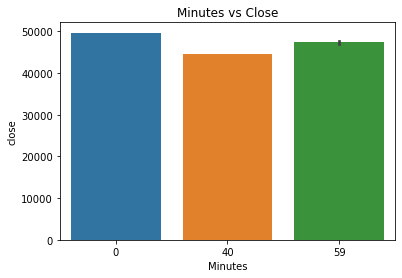

In [22]:
sns.barplot(x='Minutes', y='close', data=data).set(title='Minutes vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

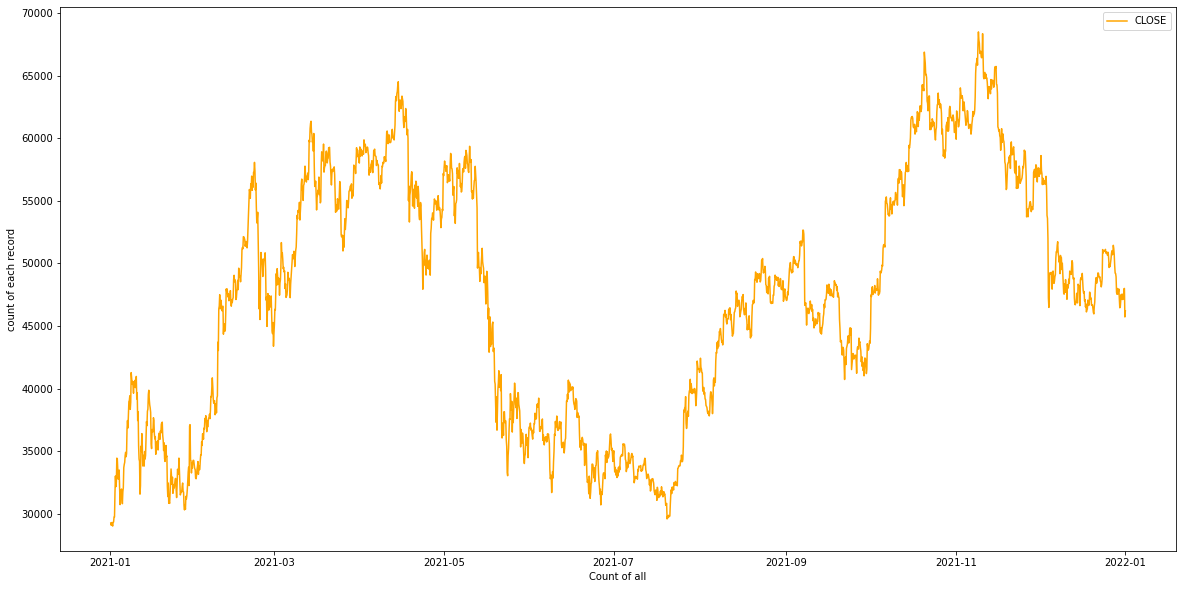

In [23]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

# Extracting the Indicators

# ------------------------------------------------------------------------------------------------------

### EMA and SMA 

### Moving average features

In [24]:
data['EMA_50'] = data['close'].ewm(50).mean().shift() # calculting the ema 50
data['EMA_200'] =data['close'].ewm(200).mean().shift() # calculting the ema 200
data['MA_50'] = data['close'].rolling(50).mean() # calculting the ma 50
data['MA_200'] = data['close'].rolling(200).mean() # calculting the ma 200
fig = go.Figure() #plot setting 
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50')) # plotting the ema 50
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200')) # plotting the ema 200
fig.add_trace(go.Scatter(x=data.index, y=data.close, name='close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() #showing the plot 

In [25]:
fig = go.Figure() #plot setting 
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50')) # plotting the ma 50
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200')) # plotting the ma 200
fig.add_trace(go.Scatter(x=data.index, y=data.close, name='close', line_color='dimgray', opacity=0.3)) # plotting the close 
fig.show() # showing plot 

# Final Data after features extraction and preparation

In [26]:
data=data.tail(len(data)-200) # ignoring the first 200 rows as there are Nan/missing values 
data #data 

close                    date  Month  Day  Year  \
2021-02-03 11:59:59.999  35969.41 2021-02-03 11:59:59.999      2    3  2021   
2021-02-03 15:59:59.999  36850.00 2021-02-03 15:59:59.999      2    3  2021   
2021-02-03 19:59:59.999  36788.89 2021-02-03 19:59:59.999      2    3  2021   
2021-02-03 23:59:59.999  37618.87 2021-02-03 23:59:59.999      2    3  2021   
2021-02-04 03:59:59.999  37498.78 2021-02-04 03:59:59.999      2    4  2021   
...                           ...                     ...    ...  ...   ...   
2021-12-31 07:59:59.999  47191.09 2021-12-31 07:59:59.999     12   31  2021   
2021-12-31 11:59:59.999  47975.76 2021-12-31 11:59:59.999     12   31  2021   
2021-12-31 15:59:59.999  48005.37 2021-12-31 15:59:59.999     12   31  2021   
2021-12-31 19:59:59.999  45728.28 2021-12-31 19:59:59.999     12   31  2021   
2021-12-31 23:59:59.999  46216.93 2021-12-31 23:59:59.999     12   31  2021   

                         Hour  Minutes        EMA_50       EMA_200  \
2021-02-03 11:59:59.999    11       59  33906.509391  34367.121249   
2021-02-03 15:59:59.999    15       59  33947.728373  34379.713844   
2021-02-03 19:59:59.999    19       59  34005.697258  34399.072313   
2021-02-03 23:59:59.999    23       59  34061.267380  34417.746753   
2021-02-04 03:59:59.999     3       59  34132.274164  34442.690057   
...                       ...      ...           ...           ...   
2021-12-31 07:59:59.999     7       59  49051.713156  52390.440691   
2021-12-31 11:59:59.999    11       59  49015.230349  52364.572799   
2021-12-31 15:59:59.999    15       59  48994.848577  52342.737509   
2021-12-31 19:59:59.999    19       59  48975.447036  52321.158173   
2021-12-31 23:59:59.999    23       59  48911.777094  52288.357190   

                              MA_50       MA_200  
2021-02-03 11:59:59.999  33377.3166  34555.07960  
2021-02-03 15:59:59.999  33481.4444  34593.86545  
2021-02-03 19:59:59.999  33581.2832  34631.24245  
2021-02-03 23:59:59.999  33698.6560  34673.39345  
2021-02-04 03:59:59.999  33804.4650  34715.74215  
...                             ...          ...  
2021-12-31 07:59:59.999  49339.5010  50087.34980  
2021-12-31 11:59:59.999  49328.5340  50056.54205  
2021-12-31 15:59:59.999  49326.0494  50023.99085  
2021-12-31 19:59:59.999  49273.5196  49980.16680  
2021-12-31 23:59:59.999  49221.4716  49939.77075  

[1990 rows x 11 columns]

# -----------------------------------------------------------------------------------------------------------

### Loading the whale data

In [27]:
priceData=pd.read_csv('Datasets/dataFileWhaleBTC.csv')

In [28]:
li = priceData['tweet'].str.lower().str.cat(sep=' ')

# Getting Tokenization of the text

In [29]:
priceData = priceData[['date','time','tweet']]
priceData['tweet'].head()

0    🚨 🚨 🚨 🚨  1,000 #BTC (46,917,121 USD) transferr...
1    🚨 🚨 🚨 🚨  1,000 #BTC (46,917,121 USD) transferr...
2    🚨 🚨  20,000,000 #USDT (20,000,000 USD) transfe...
3    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
4    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
Name: tweet, dtype: object

In [30]:
#nums = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'][0]
#data['amountTransfer'] = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'])[0]
priceData['amountTransfer'] = priceData['tweet'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')
priceData['amountTransfer'] = priceData['amountTransfer'].str[1]

In [31]:
data['whaleCount'] = 0

In [32]:
for i, row in enumerate(priceData.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 1
    else:
        if int(row.amountTransfer.replace(",","")) > 50000000:
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 2
        else:
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 1

# -----------------------------------------------------------------------------------------------------------

### Loading the twitter data

In [33]:
sentData=pd.read_csv('Datasets/dataFileBTC2.csv')

In [34]:
li = sentData['tweet'].str.lower().str.cat(sep=' ')

# Removing punctuation,numbers and returns list of words

In [35]:
li2 = re.sub('[^A-Za-z]+', ' ', li)

# Removing the stopwords from the text

In [36]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Getting Tokenization of the text

In [37]:
word_tokens = word_tokenize(li2)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Removing characters which have length less than 2  

In [38]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers

In [39]:
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Frequency distribution of aspect words 

In [40]:
word_dist = nltk.FreqDist(cleaned_data_title)
top100_words = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

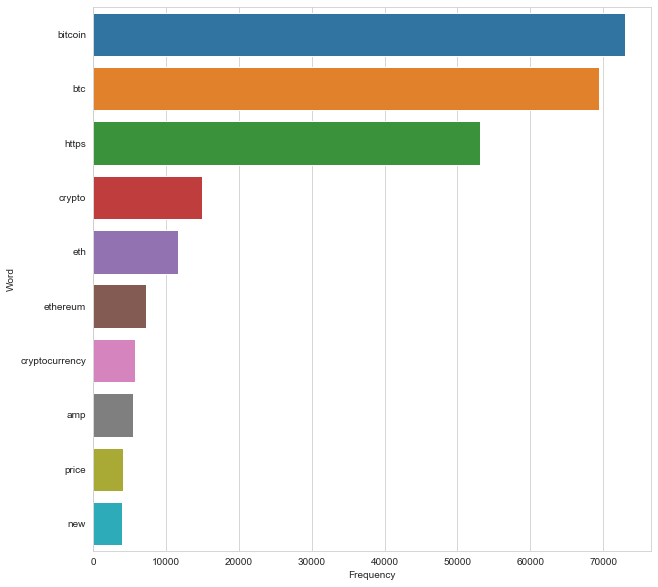

In [41]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# SentimentIntensityAnalyzer for getting sentiments

In [42]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [43]:
sentData["Polarity"] = sentData["tweet"].apply(sentiment)

In [44]:
sentData = sentData[['date','time','tweet','Polarity']]

In [45]:
sentData.tail()

date      time  \
63876  2021-01-01  00:32:02   
63877  2021-01-01  00:10:40   
63878  2021-01-01  00:06:07   
63879  2021-01-01  00:04:20   
63880  2021-01-01  00:04:12   

                                                   tweet  Polarity  
63876  These terrible #Bitcoin price predictions show...    0.1263  
63877  2020-12-31 CoinShuffle++ transaction volume wa...    0.0000  
63878  Wow. Just wow. #Bitcoin #Etheruem #XRP #Bitcoi...    0.8225  
63879  New GIVEAWAY ! #Okcash $ok $BTC #ETH  “30” WIN...    0.9378  
63880  New GIVEAWAY ! #Okcash $ok $BTC #ETH  “30” WIN...    0.9378

# Getting sentiments based on the popularity score

In [46]:
def sentiments(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [47]:
sentData['Sentiments'] = sentData.apply(sentiments, axis=1)

# sentiments with their counts

In [48]:
sentData['Sentiments'].value_counts()

Positive    30823
Neutral     21381
Negative    11677
Name: Sentiments, dtype: int64

In [49]:
sentData.iloc[:25]

date      time                                              tweet  \
0   2021-12-30  23:55:18  Você perdeu o bonde do #bitcoin em 2013, 14, 1...   
1   2021-12-30  23:47:18  Calling it now, 2022 will be the year of the #...   
2   2021-12-30  23:36:46  The scarcity argument for #Bitcoin is beyond r...   
3   2021-12-30  23:36:00  Thanks to Proton-wrapped Bitcoin (XBTC), that ...   
4   2021-12-30  23:30:59  $AMZN vs. $BTC continued analysis. #Amazon wil...   
5   2021-12-30  23:21:15  We're proud of you.  Please show amazing perfo...   
6   2021-12-30  23:09:09  Kendimi yine yalnız ve çıplak hissediyorum 🤨 #...   
7   2021-12-30  22:47:00  Imagining A Central Bank Wipeout Of Bitcoin In...   
8   2021-12-30  22:41:16  If you're a business owner you should heavily ...   
9   2021-12-30  22:30:22  I’m so bullish on this project and team. If yo...   
10  2021-12-30  21:48:51  When #Bitcoin does hit 100k which is ultimatel...   
11  2021-12-30  21:17:42  Why is the Commission of the powerhouse footba...   
12  2021-12-30  21:03:02  A demonstrative deck of our alpha #DeFi app, a...   
13  2021-12-30  20:31:17  Even before the merge happens ETH is nearly ne...   
14  2021-12-30  20:26:38  The hype around $coti is rising with #cardano'...   
15  2021-12-30  20:18:04  $FLUX Daily Highlights, 30 December 2021 - Cur...   
16  2021-12-30  20:08:30  #Bitcoin 8h Heikin Ashi Candles showing a tren...   
17  2021-12-30  20:05:45  Ravencoin codes intent was to create a #Bitcoi...   
18  2021-12-30  19:27:26  $MARA "has outperformed the #Bitcoin price so ...   
19  2021-12-30  19:20:33  O @BitcoinExplica entrou de cabeça no bitcoin ...   
20  2021-12-30  19:20:14  If $BTC #Bitcoin can rally to $48150 we would ...   
21  2021-12-30  18:58:42  F•ck #Bitpanda, F•ck #Coinbase. If you like to...   
22  2021-12-30  18:56:21  Update: LTH-NUPL #Bitcoin #BTC  Last time I po...   
23  2021-12-30  18:55:37  After extensive research and comparisons. Here...   
24  2021-12-30  18:51:52  Önceden de paniklememenizi belirtmiştim fiyat ...   

    Polarity Sentiments  
0     0.0000    Neutral  
1     0.2732   Positive  
2    -0.6456   Negative  
3     0.8268   Positive  
4     0.0772   Positive  
5     0.9524   Positive  
6     0.0000    Neutral  
7    -0.4215   Negative  
8     0.8622   Positive  
9     0.3400   Positive  
10    0.2023   Positive  
11    0.0000    Neutral  
12    0.6800   Positive  
13    0.8215   Positive  
14    0.0000    Neutral  
15    0.8494   Positive  
16    0.0000    Neutral  
17    0.8381   Positive  
18    0.3818   Positive  
19   -0.5267   Negative  
20    0.0000    Neutral  
21    0.8694   Positive  
22    0.1531   Positive  
23    0.7424   Positive  
24    0.0000    Neutral

In [50]:
data['sentimentCount'] = 0

In [51]:
for i, row in enumerate(sentData.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] -= 1
    else:
        if row.Sentiments == "Positive":
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            data.loc[data['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] -= 1

In [52]:
data.head()

close                    date  Month  Day  Year  \
2021-02-03 11:59:59.999  35969.41 2021-02-03 11:59:59.999      2    3  2021   
2021-02-03 15:59:59.999  36850.00 2021-02-03 15:59:59.999      2    3  2021   
2021-02-03 19:59:59.999  36788.89 2021-02-03 19:59:59.999      2    3  2021   
2021-02-03 23:59:59.999  37618.87 2021-02-03 23:59:59.999      2    3  2021   
2021-02-04 03:59:59.999  37498.78 2021-02-04 03:59:59.999      2    4  2021   

                         Hour  Minutes        EMA_50       EMA_200  \
2021-02-03 11:59:59.999    11       59  33906.509391  34367.121249   
2021-02-03 15:59:59.999    15       59  33947.728373  34379.713844   
2021-02-03 19:59:59.999    19       59  34005.697258  34399.072313   
2021-02-03 23:59:59.999    23       59  34061.267380  34417.746753   
2021-02-04 03:59:59.999     3       59  34132.274164  34442.690057   

                              MA_50       MA_200  whaleCount  sentimentCount  
2021-02-03 11:59:59.999  33377.3166  34555.07960           0               5  
2021-02-03 15:59:59.999  33481.4444  34593.86545          36              14  
2021-02-03 19:59:59.999  33581.2832  34631.24245          19              15  
2021-02-03 23:59:59.999  33698.6560  34673.39345           7              15  
2021-02-04 03:59:59.999  33804.4650  34715.74215           8               4

In [53]:
def adjustDatasetPredict(model):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 

    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]

        X_train=first90.drop(columns=['close','date']) #dropping the 'Close','date'
        y_train=first90['close'] # output close 
        newDataframe = pd.DataFrame().append([row[1]])
        X_test = newDataframe.drop(columns=['close','date'])

        prediction_test = model.predict(X_test)
        returnVal.append(prediction_test[0])
        row[1]['close'] = prediction_test[0]

        first90 = first90.append([row[1]])

        first90['EMA_50'] = first90['close'].ewm(50).mean().shift() # calculting the ema 50
        first90['EMA_200'] =first90['close'].ewm(200).mean().shift() # calculting the ema 200
        first90['MA_50'] = first90['close'].rolling(50).mean() # calculting the ma 50
        first90['MA_200'] = first90['close'].rolling(200).mean() # calculting the ma 200
    
    return returnVal

def adjustDatasetPredictSARIMAX(best_cfg):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 
     
    second10['EMA_50'] = np.nan
    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]
        
        newDataframe = pd.DataFrame().append([row[1]])
        newDataframe['close'].loc[:] = np.nan
        df6 = pd.concat([first90,newDataframe])

        model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=(best_cfg),seasonal_order=(1,1,1,12))
        results=model.fit()
        
        preds = results.predict(start=len(df6), end=len(df6), exog=newDataframe[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']], dynamic = True)
        predSeries = pd.Series(preds.tolist())
        
        returnVal.append(predSeries[0])
        row[1]['close'] = predSeries[0]
        new90 = first90.append([row[1]])

        new90['EMA_50'] = new90['close'].ewm(50).mean().shift() # calculting the ema 50
        new90['EMA_200'] =new90['close'].ewm(200).mean().shift() # calculting the ema 200
        new90['MA_50'] = new90['close'].rolling(50).mean() # calculting the ma 50
        new90['MA_200'] = new90['close'].rolling(200).mean() # calculting the ma 200
        first90 = first90.append(new90.iloc[-1])
        print(first90.iloc[-1])
    return returnVal

def adjustDatasetPredictARIMAX(best_cfg):
    first90 = data[:int(trainTestSplit*(len(data)))] # training input features split 
    second10 = data[int(trainTestSplit*(len(data))):]  # training output split 
     
    second10['EMA_50'] = np.nan
    second10['EMA_200'] = np.nan
    second10['MA_50'] = np.nan
    second10['MA_200'] = np.nan
    second10['close'] = np.nan
    second10.head()

    returnVal =[]
    for row in second10.iterrows():
        row[1]['EMA_50'] = first90['EMA_50'].iloc[-1]
        row[1]['EMA_200'] =first90['EMA_200'].iloc[-1]
        row[1]['MA_50'] = first90['MA_50'].iloc[-1]
        row[1]['MA_200'] = first90['MA_200'].iloc[-1]
        
        newDataframe = pd.DataFrame().append([row[1]])
        newDataframe['close'].loc[:] = np.nan
        df6 = pd.concat([first90,newDataframe])

        model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=(best_cfg))
        results=model.fit()
        
        preds = results.predict(start=len(df6), end=len(df6), exog=newDataframe[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']], dynamic = True)
        predSeries = pd.Series(preds.tolist())
        
        returnVal.append(predSeries[0])
        row[1]['close'] = predSeries[0]
        new90 = first90.append([row[1]])

        new90['EMA_50'] = new90['close'].ewm(50).mean().shift() # calculting the ema 50
        new90['EMA_200'] =new90['close'].ewm(200).mean().shift() # calculting the ema 200
        new90['MA_50'] = new90['close'].rolling(50).mean() # calculting the ma 50
        new90['MA_200'] = new90['close'].rolling(200).mean() # calculting the ma 200
        first90 = first90.append(new90.iloc[-1])
        print(first90.iloc[-1])
    return returnVal

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [54]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

Month  Day  Year  Hour  Minutes        EMA_50  \
2021-02-03 11:59:59.999      2    3  2021    11       59  33906.509391   
2021-02-03 15:59:59.999      2    3  2021    15       59  33947.728373   
2021-02-03 19:59:59.999      2    3  2021    19       59  34005.697258   
2021-02-03 23:59:59.999      2    3  2021    23       59  34061.267380   
2021-02-04 03:59:59.999      2    4  2021     3       59  34132.274164   
...                        ...  ...   ...   ...      ...           ...   
2021-12-31 07:59:59.999     12   31  2021     7       59  49051.713156   
2021-12-31 11:59:59.999     12   31  2021    11       59  49015.230349   
2021-12-31 15:59:59.999     12   31  2021    15       59  48994.848577   
2021-12-31 19:59:59.999     12   31  2021    19       59  48975.447036   
2021-12-31 23:59:59.999     12   31  2021    23       59  48911.777094   

                              EMA_200       MA_50       MA_200  whaleCount  \
2021-02-03 11:59:59.999  34367.121249  33377.3166  34555.07960           0   
2021-02-03 15:59:59.999  34379.713844  33481.4444  34593.86545          36   
2021-02-03 19:59:59.999  34399.072313  33581.2832  34631.24245          19   
2021-02-03 23:59:59.999  34417.746753  33698.6560  34673.39345           7   
2021-02-04 03:59:59.999  34442.690057  33804.4650  34715.74215           8   
...                               ...         ...          ...         ...   
2021-12-31 07:59:59.999  52390.440691  49339.5010  50087.34980           0   
2021-12-31 11:59:59.999  52364.572799  49328.5340  50056.54205           0   
2021-12-31 15:59:59.999  52342.737509  49326.0494  50023.99085           0   
2021-12-31 19:59:59.999  52321.158173  49273.5196  49980.16680           0   
2021-12-31 23:59:59.999  52288.357190  49221.4716  49939.77075           0   

                         sentimentCount  
2021-02-03 11:59:59.999               5  
2021-02-03 15:59:59.999              14  
2021-02-03 19:59:59.999              15  
2021-02-03 23:59:59.999              15  
2021-02-04 03:59:59.999               4  
...                                 ...  
2021-12-31 07:59:59.999               0  
2021-12-31 11:59:59.999               0  
2021-12-31 15:59:59.999               0  
2021-12-31 19:59:59.999               0  
2021-12-31 23:59:59.999               0  

[1990 rows x 11 columns]

### Taking target as output

In [55]:
y=data['close'] # output close 
y #output 

2021-02-03 11:59:59.999    35969.41
2021-02-03 15:59:59.999    36850.00
2021-02-03 19:59:59.999    36788.89
2021-02-03 23:59:59.999    37618.87
2021-02-04 03:59:59.999    37498.78
                             ...   
2021-12-31 07:59:59.999    47191.09
2021-12-31 11:59:59.999    47975.76
2021-12-31 15:59:59.999    48005.37
2021-12-31 19:59:59.999    45728.28
2021-12-31 23:59:59.999    46216.93
Name: close, Length: 1990, dtype: float64

### Spliting the data into training and Testing

In [56]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [57]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=2677.203
ARIMA(0, 0, 1) RMSE=2401.784
ARIMA(0, 0, 2) RMSE=2714.993
ARIMA(0, 1, 0) RMSE=13514.877
ARIMA(0, 1, 1) RMSE=28537.893
ARIMA(0, 1, 2) RMSE=65400.070
ARIMA(0, 2, 0) RMSE=321130.787
ARIMA(0, 2, 1) RMSE=339561.321
ARIMA(0, 2, 2) RMSE=334907.460
ARIMA(1, 0, 0) RMSE=14104.269
ARIMA(1, 0, 1) RMSE=23284.273
ARIMA(1, 0, 2) RMSE=100291.776
ARIMA(1, 1, 0) RMSE=147264.135
ARIMA(1, 1, 1) RMSE=118507.349
ARIMA(1, 1, 2) RMSE=192877.923
ARIMA(1, 2, 0) RMSE=341760.127
ARIMA(1, 2, 1) RMSE=341657.737
ARIMA(1, 2, 2) RMSE=327546.261
ARIMA(2, 0, 0) RMSE=115849.868
ARIMA(2, 0, 1) RMSE=14225.506
ARIMA(2, 0, 2) RMSE=92157.035
ARIMA(2, 1, 0) RMSE=90443.416
ARIMA(2, 1, 1) RMSE=145186.344
ARIMA(2, 1, 2) RMSE=80629.608
ARIMA(2, 2, 0) RMSE=334628.284
ARIMA(2, 2, 1) RMSE=334454.768
ARIMA(2, 2, 2) RMSE=331123.212
ARIMA(4, 0, 0) RMSE=1347484.078
ARIMA(4, 0, 1) RMSE=221788.484
ARIMA(4, 0, 2) RMSE=189456.489
ARIMA(4, 1, 0) RMSE=213038.110
ARIMA(4, 1, 1) RMSE=146497.041
ARIMA(4, 1, 2) RMSE=86

In [58]:
%%time
y_pred_test = adjustDatasetPredictARIMAX(best_cfg)

close                           64381.217363
date              2021-10-26 20:59:59.999000
Month                                     10
Day                                       26
Year                                    2021
Hour                                      20
Minutes                                   59
EMA_50                          59768.224261
EMA_200                         51717.719814
MA_50                           62645.087747
MA_200                          53887.183687
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-26 20:59:59.999000, dtype: object
close                           63879.353059
date              2021-10-27 00:59:59.999000
Month                                     10
Day                                       27
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                          59858.675106
EMA_200

close                           64503.894809
date              2021-10-29 00:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                          60777.237278
EMA_200                         52502.111403
MA_50                           62904.456753
MA_200                          55254.808588
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-29 00:59:59.999000, dtype: object
close                           64107.822549
date              2021-10-29 04:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       4
Minutes                                   59
EMA_50                          60850.308994
EMA_200

close                           64318.682153
date              2021-10-31 03:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          61461.019546
EMA_200                         53211.488307
MA_50                           62947.460983
MA_200                          56604.020096
whaleCount                                 1
sentimentCount                             7
Name: 2021-10-31 03:59:59.999000, dtype: object
close                           64146.287747
date              2021-10-31 07:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          61517.052146
EMA_200

close                           64579.893564
date              2021-11-02 07:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          62192.385267
EMA_200                         53931.297988
MA_50                           63933.957797
MA_200                          58088.198949
whaleCount                                 1
sentimentCount                             1
Name: 2021-11-02 07:59:59.999000, dtype: object
close                           65264.346528
date              2021-11-02 11:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          62239.199155
EMA_200

close                           65618.707794
date              2021-11-04 11:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                           62978.40877
EMA_200                         54667.056901
MA_50                           64632.686555
MA_200                          59423.183757
whaleCount                                 1
sentimentCount                            14
Name: 2021-11-04 11:59:59.999000, dtype: object
close                            66915.74741
date              2021-11-04 15:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          63030.179339
EMA_200

close                           65879.054509
date              2021-11-06 15:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          63680.773436
EMA_200                         55383.684771
MA_50                           65120.396784
MA_200                          60604.529798
whaleCount                                 1
sentimentCount                            12
Name: 2021-11-06 15:59:59.999000, dtype: object
close                           65761.884271
date              2021-11-06 19:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          63723.876987
EMA_200

close                           66381.074397
date              2021-11-08 19:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          64337.438776
EMA_200                         56084.717758
MA_50                           65817.354508
MA_200                          61685.362615
whaleCount                                 8
sentimentCount                            13
Name: 2021-11-08 19:59:59.999000, dtype: object
close                           67628.897223
date              2021-11-08 23:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          64377.510063
EMA_200

close                            68527.92616
date              2021-11-10 23:59:59.999000
Month                                     11
Day                                       10
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          64971.045875
EMA_200                         56777.539256
MA_50                           66440.608238
MA_200                          62513.107679
whaleCount                                 7
sentimentCount                            23
Name: 2021-11-10 23:59:59.999000, dtype: object
close                           67073.008572
date              2021-11-11 03:59:59.999000
Month                                     11
Day                                       11
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          65040.788626
EMA_200

close                           67873.419903
date              2021-11-13 03:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          65603.482761
EMA_200                         57466.759784
MA_50                           66917.594726
MA_200                          63342.833118
whaleCount                                 3
sentimentCount                            10
Name: 2021-11-13 03:59:59.999000, dtype: object
close                           67888.425305
date              2021-11-13 07:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          65647.991333
EMA_200

close                           67878.748582
date              2021-11-15 07:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          66149.612798
EMA_200                         58127.973606
MA_50                           67430.334668
MA_200                          64083.681715
whaleCount                                 6
sentimentCount                             6
Name: 2021-11-15 07:59:59.999000, dtype: object
close                            67959.74757
date              2021-11-15 11:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          66183.517421
EMA_200

close                           68174.574393
date              2021-11-17 11:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          66695.294965
EMA_200                         58782.601369
MA_50                           67905.412137
MA_200                          64831.612559
whaleCount                                15
sentimentCount                            15
Name: 2021-11-17 11:59:59.999000, dtype: object
close                           68201.628769
date              2021-11-17 15:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          66724.300444
EMA_200

close                            69695.58484
date              2021-11-19 15:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          67142.529548
EMA_200                          59402.11486
MA_50                           68293.693633
MA_200                           65346.01484
whaleCount                                13
sentimentCount                            16
Name: 2021-11-19 15:59:59.999000, dtype: object
close                           68838.363107
date              2021-11-19 19:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          67192.589455
EMA_200

close                           69194.853029
date              2021-11-21 19:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          67596.681627
EMA_200                         60013.582558
MA_50                            68646.05985
MA_200                          65831.777704
whaleCount                                 3
sentimentCount                            12
Name: 2021-11-21 19:59:59.999000, dtype: object
close                           69093.693215
date              2021-11-21 23:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          67628.018322
EMA_200

close                           69618.321448
date              2021-11-23 23:59:59.999000
Month                                     11
Day                                       23
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          68051.291999
EMA_200                         60614.762059
MA_50                           69055.318831
MA_200                          66158.191694
whaleCount                                 3
sentimentCount                             5
Name: 2021-11-23 23:59:59.999000, dtype: object
close                           69758.508092
date              2021-11-24 03:59:59.999000
Month                                     11
Day                                       24
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          68082.018066
EMA_200

close                           70114.052101
date              2021-11-26 03:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          68423.434987
EMA_200                         61184.403187
MA_50                           69335.109528
MA_200                          66672.654657
whaleCount                                15
sentimentCount                             7
Name: 2021-11-26 03:59:59.999000, dtype: object
close                           70123.030023
date              2021-11-26 07:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          68456.584342
EMA_200

close                           69958.031212
date              2021-11-28 07:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          68883.055803
EMA_200                         61766.398185
MA_50                             69760.1649
MA_200                          67242.867945
whaleCount                                 5
sentimentCount                             2
Name: 2021-11-28 07:59:59.999000, dtype: object
close                           70108.801499
date              2021-11-28 11:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          68904.133752
EMA_200

close                           70835.537677
date              2021-11-30 11:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          69276.594944
EMA_200                         62321.895546
MA_50                           70143.221287
MA_200                          67697.981876
whaleCount                                 0
sentimentCount                             0
Name: 2021-11-30 11:59:59.999000, dtype: object
close                           70115.527147
date              2021-11-30 15:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          69307.162449
EMA_200

close                             71203.0836
date              2021-12-02 15:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          69593.136531
EMA_200                         62845.534893
MA_50                           70409.231503
MA_200                          68133.341591
whaleCount                                22
sentimentCount                             6
Name: 2021-12-02 15:59:59.999000, dtype: object
close                           71079.052999
date              2021-12-02 19:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          69624.704121
EMA_200

close                           70952.629384
date              2021-12-04 19:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          69989.098342
EMA_200                         63377.993088
MA_50                           70796.531117
MA_200                          68591.610436
whaleCount                                18
sentimentCount                            14
Name: 2021-12-04 19:59:59.999000, dtype: object
close                           71635.378589
date              2021-12-04 23:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          70007.991107
EMA_200

close                           72369.441275
date              2021-12-06 23:59:59.999000
Month                                     12
Day                                        6
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          70294.798739
EMA_200                         63877.201529
MA_50                           71045.645651
MA_200                          68981.930873
whaleCount                                15
sentimentCount                            16
Name: 2021-12-06 23:59:59.999000, dtype: object
close                           71504.758088
date              2021-12-07 03:59:59.999000
Month                                     12
Day                                        7
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          70335.478004
EMA_200

close                           71840.066944
date              2021-12-09 03:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          70622.520353
EMA_200                         64370.783557
MA_50                           71326.695713
MA_200                          69354.066361
whaleCount                                 2
sentimentCount                             8
Name: 2021-12-09 03:59:59.999000, dtype: object
close                           71665.596153
date              2021-12-09 07:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          70646.393815
EMA_200

close                           71667.267066
date              2021-12-11 07:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          70905.490506
EMA_200                         64841.425735
MA_50                           71593.911816
MA_200                           69717.52598
whaleCount                                 1
sentimentCount                             2
Name: 2021-12-11 07:59:59.999000, dtype: object
close                           72212.629712
date              2021-12-11 11:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          70920.427302
EMA_200

close                           71826.105935
date              2021-12-13 11:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          71136.430144
EMA_200                         65286.175012
MA_50                           71745.783831
MA_200                          70037.662999
whaleCount                                 7
sentimentCount                             1
Name: 2021-12-13 11:59:59.999000, dtype: object
close                           72976.328267
date              2021-12-13 15:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          71149.953199
EMA_200

close                           72566.619413
date              2021-12-15 15:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          71364.755477
EMA_200                         65716.763642
MA_50                           71941.576902
MA_200                          70339.163058
whaleCount                                 6
sentimentCount                             9
Name: 2021-12-15 15:59:59.999000, dtype: object
close                           72582.287534
date              2021-12-15 19:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          71388.321436
EMA_200

close                           73043.378919
date              2021-12-17 19:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          71588.149142
EMA_200                         66133.403451
MA_50                           72110.815026
MA_200                          70633.455838
whaleCount                                 8
sentimentCount                            13
Name: 2021-12-17 19:59:59.999000, dtype: object
close                           72519.467604
date              2021-12-17 23:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          71616.683059
EMA_200

close                           72524.819149
date              2021-12-19 23:59:59.999000
Month                                     12
Day                                       19
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          71799.193609
EMA_200                         66534.408101
MA_50                           72260.622781
MA_200                          70890.762745
whaleCount                                 2
sentimentCount                             5
Name: 2021-12-19 23:59:59.999000, dtype: object
close                           72498.107286
date              2021-12-20 03:59:59.999000
Month                                     12
Day                                       20
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          71813.421561
EMA_200

close                           72786.447687
date              2021-12-22 03:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          72032.675436
EMA_200                         66929.066329
MA_50                           72473.388621
MA_200                          71174.644611
whaleCount                                 9
sentimentCount                             4
Name: 2021-12-22 03:59:59.999000, dtype: object
close                            72537.71779
date              2021-12-22 07:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          72047.455284
EMA_200

close                            73137.82958
date              2021-12-24 07:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          72257.192245
EMA_200                         67310.965147
MA_50                           72698.139627
MA_200                          71431.878239
whaleCount                                16
sentimentCount                             4
Name: 2021-12-24 07:59:59.999000, dtype: object
close                           72956.862496
date              2021-12-24 11:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          72274.459644
EMA_200

close                           72878.389844
date              2021-12-26 11:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          72441.184103
EMA_200                         67672.436391
MA_50                           72864.099445
MA_200                          71668.511557
whaleCount                                 0
sentimentCount                             2
Name: 2021-12-26 11:59:59.999000, dtype: object
close                            73485.58982
date              2021-12-26 15:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          72449.756765
EMA_200

close                           73547.333096
date              2021-12-28 15:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          72651.990405
EMA_200                         68029.903873
MA_50                           73104.105703
MA_200                           71911.99925
whaleCount                                 8
sentimentCount                             6
Name: 2021-12-28 15:59:59.999000, dtype: object
close                           73478.870379
date              2021-12-28 19:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          72669.546144
EMA_200

close                           74297.093978
date              2021-12-30 19:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          72876.807606
EMA_200                         68382.323783
MA_50                           73316.893116
MA_200                          72131.958406
whaleCount                                31
sentimentCount                             8
Name: 2021-12-30 19:59:59.999000, dtype: object
close                           73354.906408
date              2021-12-30 23:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          72904.656358
EMA_200

# Evaluation Measures on Test data

# MSE

In [59]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  289898625.3796


# MAE

In [60]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  14458.823


# RMSE

In [61]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  17026.40964


# MAPE

In [62]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.28331


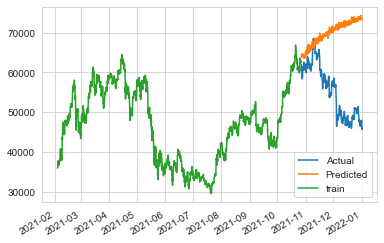

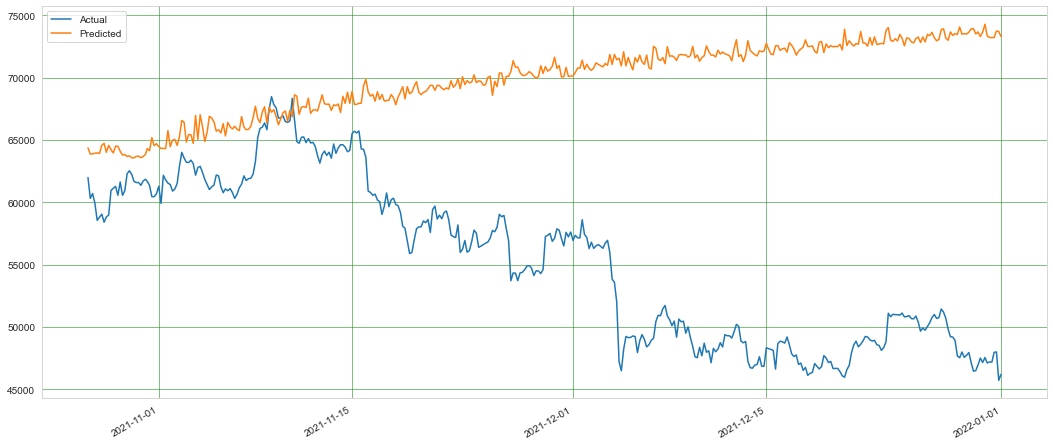

In [63]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [64]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])
    #exog = np.empty([df6['EMA_50'], df6['EMA_200'],df6['MA_50'],df6['MA_200']])
    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6[['EMA_50', 'EMA_200','MA_50','MA_200','sentimentCount','whaleCount']],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=4973.492
ARIMA(0, 0, 1) RMSE=2667.322
ARIMA(0, 0, 2) RMSE=2385.374
ARIMA(0, 1, 0) RMSE=49413.813
ARIMA(0, 1, 1) RMSE=170601.765
ARIMA(0, 1, 2) RMSE=291219.317
ARIMA(0, 2, 0) RMSE=1309852.751
ARIMA(0, 2, 1) RMSE=1310537.558
ARIMA(0, 2, 2) RMSE=1270769.351
ARIMA(1, 0, 0) RMSE=15646.899
ARIMA(1, 0, 1) RMSE=39101.487
ARIMA(1, 0, 2) RMSE=68003.958
ARIMA(1, 1, 0) RMSE=212191.504
ARIMA(1, 1, 1) RMSE=63375.363
ARIMA(1, 1, 2) RMSE=35460.417
ARIMA(1, 2, 0) RMSE=1269176.141
ARIMA(1, 2, 1) RMSE=1270092.872
ARIMA(1, 2, 2) RMSE=1271923.645
ARIMA(2, 0, 0) RMSE=214345.180
ARIMA(2, 0, 1) RMSE=22572.562
ARIMA(2, 0, 2) RMSE=58915.158
ARIMA(2, 1, 0) RMSE=285388.981
ARIMA(2, 1, 1) RMSE=31345.166
ARIMA(2, 1, 2) RMSE=25148.788
ARIMA(2, 2, 0) RMSE=1270650.797
ARIMA(2, 2, 1) RMSE=1270796.307
ARIMA(2, 2, 2) RMSE=1267577.463
ARIMA(4, 0, 0) RMSE=130375.629
ARIMA(4, 0, 1) RMSE=155826.313
ARIMA(4, 0, 2) RMSE=22870.147
ARIMA(4, 1, 0) RMSE=308629.487
ARIMA(4, 1, 1) RMSE=254992.040
ARIMA(4, 1, 2) R

In [65]:
%%time
y_pred_test = adjustDatasetPredictSARIMAX(best_cfg)

close                           62391.958479
date              2021-10-26 20:59:59.999000
Month                                     10
Day                                       26
Year                                    2021
Hour                                      20
Minutes                                   59
EMA_50                          59768.224261
EMA_200                         51717.719814
MA_50                            62605.30257
MA_200                          53877.237392
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-26 20:59:59.999000, dtype: object
close                           62681.141555
date              2021-10-27 00:59:59.999000
Month                                     10
Day                                       27
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                           59819.67003
EMA_200

close                           63633.961902
date              2021-10-29 00:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       0
Minutes                                   59
EMA_50                          60522.651393
EMA_200                         52431.926232
MA_50                           62596.822452
MA_200                          55177.900013
whaleCount                                 0
sentimentCount                             0
Name: 2021-10-29 00:59:59.999000, dtype: object
close                           63623.417773
date              2021-10-29 04:59:59.999000
Month                                     10
Day                                       29
Year                                    2021
Hour                                       4
Minutes                                   59
EMA_50                          60583.657482
EMA_200

close                           63208.409937
date              2021-10-31 03:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          61120.337964
EMA_200                         53105.412375
MA_50                           62467.513654
MA_200                          56484.033264
whaleCount                                 1
sentimentCount                             7
Name: 2021-10-31 03:59:59.999000, dtype: object
close                           62634.877727
date              2021-10-31 07:59:59.999000
Month                                     10
Day                                       31
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          61161.280552
EMA_200

close                            63766.22907
date              2021-11-02 07:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          61671.908412
EMA_200                         53760.820738
MA_50                           63165.815789
MA_200                          57896.163447
whaleCount                                 1
sentimentCount                             1
Name: 2021-11-02 07:59:59.999000, dtype: object
close                           64699.361423
date              2021-11-02 11:59:59.999000
Month                                     11
Day                                        2
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          61712.973523
EMA_200

close                           64602.685663
date              2021-11-04 11:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          62237.439301
EMA_200                         54414.031321
MA_50                           63546.110693
MA_200                          59133.771356
whaleCount                                 1
sentimentCount                            14
Name: 2021-11-04 11:59:59.999000, dtype: object
close                           63483.942136
date              2021-11-04 15:59:59.999000
Month                                     11
Day                                        4
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          62283.816681
EMA_200

close                           63619.164145
date              2021-11-06 15:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          62686.107148
EMA_200                         55029.838406
MA_50                           63789.965218
MA_200                          60188.092752
whaleCount                                 1
sentimentCount                            12
Name: 2021-11-06 15:59:59.999000, dtype: object
close                           65790.231546
date              2021-11-06 19:59:59.999000
Month                                     11
Day                                        6
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          62704.402383
EMA_200

close                           66293.502057
date              2021-11-08 19:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          63085.865002
EMA_200                         55621.019695
MA_50                           64185.180335
MA_200                          61143.592721
whaleCount                                 8
sentimentCount                            13
Name: 2021-11-08 19:59:59.999000, dtype: object
close                           63092.322904
date              2021-11-08 23:59:59.999000
Month                                     11
Day                                        8
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          63148.759846
EMA_200

close                           62584.924114
date              2021-11-10 23:59:59.999000
Month                                     11
Day                                       10
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          63430.708496
EMA_200                         56186.094537
MA_50                           64337.420385
MA_200                          61780.242473
whaleCount                                 7
sentimentCount                            23
Name: 2021-11-10 23:59:59.999000, dtype: object
close                           67165.046438
date              2021-11-11 03:59:59.999000
Month                                     11
Day                                       11
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          63414.124488
EMA_200

close                           67306.085217
date              2021-11-13 03:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          63696.816841
EMA_200                         56714.989462
MA_50                           64549.232651
MA_200                          62432.648309
whaleCount                                 3
sentimentCount                            10
Name: 2021-11-13 03:59:59.999000, dtype: object
close                           61964.071881
date              2021-11-13 07:59:59.999000
Month                                     11
Day                                       13
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          63767.586809
EMA_200

close                           61783.213715
date              2021-11-15 07:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          63987.038866
EMA_200                         57234.527106
MA_50                            64595.39328
MA_200                          62950.908343
whaleCount                                 6
sentimentCount                             6
Name: 2021-11-15 07:59:59.999000, dtype: object
close                           68256.740302
date              2021-11-15 11:59:59.999000
Month                                     11
Day                                       15
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          63943.826608
EMA_200

close                           66998.683846
date              2021-11-17 11:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          64179.698567
EMA_200                         57711.722208
MA_50                           64831.773788
MA_200                          63481.680232
whaleCount                                15
sentimentCount                            15
Name: 2021-11-17 11:59:59.999000, dtype: object
close                           61941.856585
date              2021-11-17 15:59:59.999000
Month                                     11
Day                                       17
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          64234.972788
EMA_200

close                            62953.44708
date              2021-11-19 15:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          64313.927465
EMA_200                         58155.074062
MA_50                           64724.741252
MA_200                          63716.686924
whaleCount                                13
sentimentCount                            16
Name: 2021-11-19 15:59:59.999000, dtype: object
close                           67014.999969
date              2021-11-19 19:59:59.999000
Month                                     11
Day                                       19
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          64287.251379
EMA_200

close                           65478.800368
date              2021-11-21 19:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          64403.549729
EMA_200                         58565.941543
MA_50                             64881.0672
MA_200                          63928.718562
whaleCount                                 3
sentimentCount                            12
Name: 2021-11-21 19:59:59.999000, dtype: object
close                           62646.705182
date              2021-11-21 23:59:59.999000
Month                                     11
Day                                       21
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          64424.633074
EMA_200

close                           63843.189197
date              2021-11-23 23:59:59.999000
Month                                     11
Day                                       23
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          64390.105996
EMA_200                         58929.557463
MA_50                           64569.706447
MA_200                          63905.336596
whaleCount                                 3
sentimentCount                             5
Name: 2021-11-23 23:59:59.999000, dtype: object
close                           65207.170026
date              2021-11-24 03:59:59.999000
Month                                     11
Day                                       24
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          64379.382137
EMA_200

close                            62945.27404
date              2021-11-26 03:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          64251.826534
EMA_200                         59235.403025
MA_50                           64401.885695
MA_200                          64030.727718
whaleCount                                15
sentimentCount                             7
Name: 2021-11-26 03:59:59.999000, dtype: object
close                           62658.945649
date              2021-11-26 07:59:59.999000
Month                                     11
Day                                       26
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          64226.207857
EMA_200

close                           63566.662552
date              2021-11-28 07:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          63993.759262
EMA_200                          59479.26931
MA_50                            63913.97201
MA_200                           64128.09449
whaleCount                                 5
sentimentCount                             2
Name: 2021-11-28 07:59:59.999000, dtype: object
close                           63881.943716
date              2021-11-28 11:59:59.999000
Month                                     11
Day                                       28
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          63985.384817
EMA_200

close                           61813.977451
date              2021-11-30 11:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          63731.631099
EMA_200                         59691.137105
MA_50                           63464.978063
MA_200                          64113.051131
whaleCount                                 0
sentimentCount                             0
Name: 2021-11-30 11:59:59.999000, dtype: object
close                           61908.179738
date              2021-11-30 15:59:59.999000
Month                                     11
Day                                       30
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          63694.030047
EMA_200

close                           62173.034108
date              2021-12-02 15:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          63308.168963
EMA_200                         59828.405982
MA_50                           62826.691414
MA_200                          64036.515186
whaleCount                                22
sentimentCount                             6
Name: 2021-12-02 15:59:59.999000, dtype: object
close                           61695.151103
date              2021-12-02 19:59:59.999000
Month                                     12
Day                                        2
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          63285.911417
EMA_200

close                           60236.499611
date              2021-12-04 19:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          62801.537791
EMA_200                         59907.657588
MA_50                           62141.821984
MA_200                          63879.357144
whaleCount                                18
sentimentCount                            14
Name: 2021-12-04 19:59:59.999000, dtype: object
close                           60160.094434
date              2021-12-04 23:59:59.999000
Month                                     12
Day                                        4
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          62751.242925
EMA_200

close                           59843.249913
date              2021-12-06 23:59:59.999000
Month                                     12
Day                                        6
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          62240.621695
EMA_200                         59935.289737
MA_50                           61415.890963
MA_200                          63635.300751
whaleCount                                15
sentimentCount                            16
Name: 2021-12-06 23:59:59.999000, dtype: object
close                           60008.694018
date              2021-12-07 03:59:59.999000
Month                                     12
Day                                        7
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          62193.614405
EMA_200

close                           59562.870081
date              2021-12-09 03:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          61661.287808
EMA_200                         59920.738582
MA_50                           60640.926839
MA_200                          63340.996949
whaleCount                                 2
sentimentCount                             8
Name: 2021-12-09 03:59:59.999000, dtype: object
close                           60166.703901
date              2021-12-09 07:59:59.999000
Month                                     12
Day                                        9
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          61620.142363
EMA_200

close                           59435.338995
date              2021-12-11 07:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          61054.035107
EMA_200                         59863.330464
MA_50                           59955.115992
MA_200                          62996.415692
whaleCount                                 1
sentimentCount                             2
Name: 2021-12-11 07:59:59.999000, dtype: object
close                           58350.918906
date              2021-12-11 11:59:59.999000
Month                                     12
Day                                       11
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          61022.295967
EMA_200

close                           57710.669621
date              2021-12-13 11:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          60414.352714
EMA_200                         59761.666692
MA_50                           59221.379246
MA_200                           62562.42264
whaleCount                                 7
sentimentCount                             1
Name: 2021-12-13 11:59:59.999000, dtype: object
close                           57337.240411
date              2021-12-13 15:59:59.999000
Month                                     12
Day                                       13
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                           60361.33932
EMA_200

close                           57392.110167
date              2021-12-15 15:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          59701.650081
EMA_200                         59605.999769
MA_50                           58448.445729
MA_200                          62098.461578
whaleCount                                 6
sentimentCount                             9
Name: 2021-12-15 15:59:59.999000, dtype: object
close                           56512.600081
date              2021-12-15 19:59:59.999000
Month                                     12
Day                                       15
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          59656.364985
EMA_200

close                           55147.053673
date              2021-12-17 19:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          58959.284769
EMA_200                         59407.512405
MA_50                           57568.928223
MA_200                          61529.294206
whaleCount                                 8
sentimentCount                            13
Name: 2021-12-17 19:59:59.999000, dtype: object
close                           55463.231413
date              2021-12-17 23:59:59.999000
Month                                     12
Day                                       17
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                           58884.53514
EMA_200

close                           55037.029894
date              2021-12-19 23:59:59.999000
Month                                     12
Day                                       19
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          58137.723418
EMA_200                         59153.102115
MA_50                           56692.000751
MA_200                          60923.934394
whaleCount                                 2
sentimentCount                             5
Name: 2021-12-19 23:59:59.999000, dtype: object
close                           54942.638437
date              2021-12-20 03:59:59.999000
Month                                     12
Day                                       20
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          58076.925506
EMA_200

close                           53559.146572
date              2021-12-22 03:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       3
Minutes                                   59
EMA_50                          57236.256373
EMA_200                          58841.88986
MA_50                           55689.116292
MA_200                          60221.021668
whaleCount                                 9
sentimentCount                             4
Name: 2021-12-22 03:59:59.999000, dtype: object
close                           54010.693308
date              2021-12-22 07:59:59.999000
Month                                     12
Day                                       22
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                          57164.156181
EMA_200

close                           53159.010598
date              2021-12-24 07:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                       7
Minutes                                   59
EMA_50                           56323.15886
EMA_200                         58489.680763
MA_50                           54667.320052
MA_200                          59482.995571
whaleCount                                16
sentimentCount                             4
Name: 2021-12-24 07:59:59.999000, dtype: object
close                           52627.429488
date              2021-12-24 11:59:59.999000
Month                                     12
Day                                       24
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          56261.116737
EMA_200

close                           52053.147099
date              2021-12-26 11:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      11
Minutes                                   59
EMA_50                          55496.615597
EMA_200                         58125.368619
MA_50                            53741.17381
MA_200                          58695.424833
whaleCount                                 0
sentimentCount                             2
Name: 2021-12-26 11:59:59.999000, dtype: object
close                           51438.462556
date              2021-12-26 15:59:59.999000
Month                                     12
Day                                       26
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          55429.096607
EMA_200

close                           51216.376509
date              2021-12-28 15:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      15
Minutes                                   59
EMA_50                          54576.494473
EMA_200                         57706.485427
MA_50                           52741.280544
MA_200                          57872.932242
whaleCount                                 8
sentimentCount                             6
Name: 2021-12-28 15:59:59.999000, dtype: object
close                           50928.486015
date              2021-12-28 19:59:59.999000
Month                                     12
Day                                       28
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                          54510.609807
EMA_200

close                           48686.052164
date              2021-12-30 19:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      19
Minutes                                   59
EMA_50                           53638.03052
EMA_200                         57251.665434
MA_50                           51788.775757
MA_200                           57032.37229
whaleCount                                31
sentimentCount                             8
Name: 2021-12-30 19:59:59.999000, dtype: object
close                            49223.03485
date              2021-12-30 23:59:59.999000
Month                                     12
Day                                       30
Year                                    2021
Hour                                      23
Minutes                                   59
EMA_50                          53540.932905
EMA_200

# Evaluation Measures on Test data

# MSE

In [66]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  39794237.24542


# MAE

In [67]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  5329.5978


# RMSE

In [68]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  6308.26737


# MAPE

In [69]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.10154


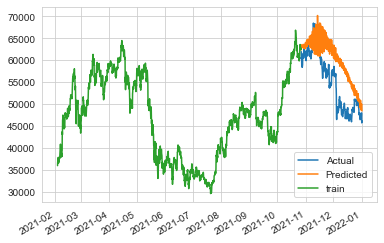

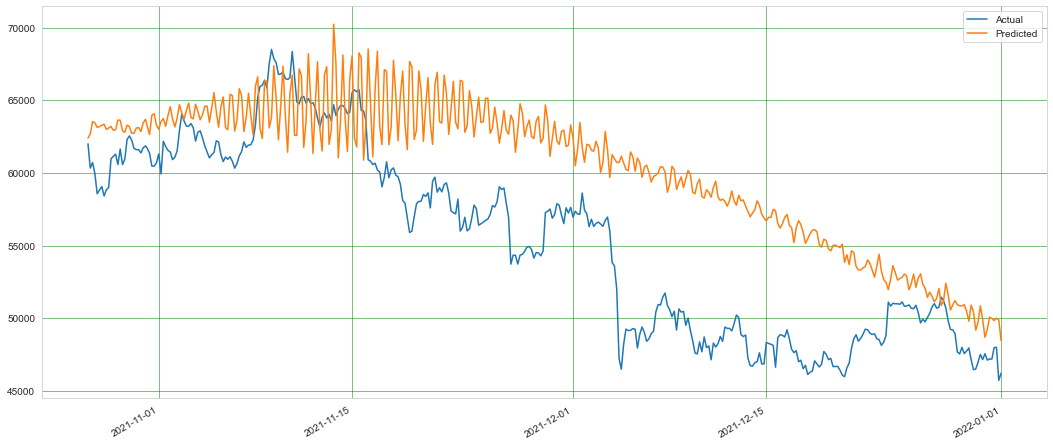

In [70]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [71]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [72]:
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 395619022.38923001
Iteration 2, loss = 31888668.96479645
Iteration 3, loss = 66948575.20736081
Iteration 4, loss = 74466806.02988712
Iteration 5, loss = 19849811.77226803
Iteration 6, loss = 12286342.77582092
Iteration 7, loss = 24022383.39156990
Iteration 8, loss = 17438611.15876731
Iteration 9, loss = 8240074.54578483
Iteration 10, loss = 9514893.43046164
Iteration 11, loss = 10821239.35195947
Iteration 12, loss = 8018926.26931905
Iteration 13, loss = 7321777.64594631
Iteration 14, loss = 7920430.57058551
Iteration 15, loss = 7261413.59998700
Iteration 16, loss = 6839525.10034858
Iteration 17, loss = 6970199.33325403
Iteration 18, loss = 6790190.02650745
Iteration 19, loss = 6633888.64634179
Iteration 20, loss = 6638356.00263791
Iteration 21, loss = 6544485.82182806
Iteration 22, loss = 6516704.46425542
Iteration 23, loss = 6450480.58891256
Iteration 24, loss = 6395023.19745256
Iteration 25, loss = 6340179.34311073
Iteration 26, loss = 6271190.75143548
Iteration 2

Iteration 81, loss = 6016332.75924617
Iteration 82, loss = 6042580.07715842
Iteration 83, loss = 6024019.64489058
Iteration 84, loss = 6002601.75621157
Iteration 85, loss = 6011585.87769023
Iteration 86, loss = 6031358.34800569
Iteration 87, loss = 5994880.58291146
Iteration 88, loss = 6014142.41036821
Iteration 89, loss = 5980610.78599809
Iteration 90, loss = 5982201.44179682
Iteration 91, loss = 5967097.04633699
Iteration 92, loss = 5968151.57060334
Iteration 93, loss = 5944883.14453038
Iteration 94, loss = 5948619.63445114
Iteration 95, loss = 5959599.50916333
Iteration 96, loss = 5953696.59930791
Iteration 97, loss = 5915737.83383874
Iteration 98, loss = 5922668.75968841
Iteration 99, loss = 5926665.13506638
Iteration 100, loss = 6002523.81854338
Iteration 101, loss = 6101674.40089202
Iteration 102, loss = 6165113.12497400
Iteration 103, loss = 6118180.29813712
Iteration 104, loss = 6158205.70775742
Iteration 105, loss = 5964148.00320802
Iteration 106, loss = 5954440.05721723
Itera

Iteration 144, loss = 5644838.09817148
Iteration 145, loss = 5639985.16832004
Iteration 146, loss = 5391228.88645301
Iteration 147, loss = 5432480.66399036
Iteration 148, loss = 5468187.30804933
Iteration 149, loss = 5395929.49908400
Iteration 150, loss = 5362506.21062038
Iteration 151, loss = 5362898.97232763
Iteration 152, loss = 5437735.90787208
Iteration 153, loss = 6115482.68577159
Iteration 154, loss = 5866215.32862600
Iteration 155, loss = 5672917.94198231
Iteration 156, loss = 5472687.20347317
Iteration 157, loss = 5506897.15310879
Iteration 158, loss = 5393068.71150358
Iteration 159, loss = 5339648.71470018
Iteration 160, loss = 5342903.64288043
Iteration 161, loss = 5423371.60705253
Iteration 162, loss = 5453199.09230939
Iteration 163, loss = 5459684.21160241
Iteration 164, loss = 5389980.82103033
Iteration 165, loss = 5293266.11643111
Iteration 166, loss = 5423404.60064248
Iteration 167, loss = 5275915.39978625
Iteration 168, loss = 5401521.12412305
Iteration 169, loss = 548

Iteration 187, loss = 2921459.87820129
Iteration 188, loss = 2928155.67664398
Iteration 189, loss = 2971216.88527703
Iteration 190, loss = 2943183.17009780
Iteration 191, loss = 2948287.08342899
Iteration 192, loss = 2928099.23819825
Iteration 193, loss = 2932805.66499028
Iteration 194, loss = 2917244.05338000
Iteration 195, loss = 2943866.26417784
Iteration 196, loss = 2914841.19674037
Iteration 197, loss = 2929122.53605633
Iteration 198, loss = 2908753.27926768
Iteration 199, loss = 2913955.47612884
Iteration 200, loss = 2921084.57863256
Iteration 201, loss = 2916994.06420966
Iteration 202, loss = 2919192.76757973
Iteration 203, loss = 2894128.98771223
Iteration 204, loss = 2912079.26228892
Iteration 205, loss = 2893156.52510543
Iteration 206, loss = 2898120.00609454
Iteration 207, loss = 2891683.74311092
Iteration 208, loss = 2891202.23015880
Iteration 209, loss = 2896581.82356107
Iteration 210, loss = 2888376.41776565
Iteration 211, loss = 2891752.26427948
Iteration 212, loss = 290

Iteration 176, loss = 5893461.10263932
Iteration 177, loss = 5881951.70527198
Iteration 178, loss = 5880599.88026063
Iteration 179, loss = 5853787.00793260
Iteration 180, loss = 5850549.10000993
Iteration 181, loss = 5857162.64298219
Iteration 182, loss = 5858989.89698287
Iteration 183, loss = 5832624.18970059
Iteration 184, loss = 5855960.38223356
Iteration 185, loss = 5834837.22232733
Iteration 186, loss = 5832636.40161710
Iteration 187, loss = 5843503.50309016
Iteration 188, loss = 5911836.54034427
Iteration 189, loss = 5853371.81573750
Iteration 190, loss = 5819806.67715883
Iteration 191, loss = 5864474.52196997
Iteration 192, loss = 5830434.51862704
Iteration 193, loss = 5802705.57533003
Iteration 194, loss = 5825984.27123625
Iteration 195, loss = 5806167.89166331
Iteration 196, loss = 5797911.15423982
Iteration 197, loss = 5794108.84139333
Iteration 198, loss = 5782184.82352026
Iteration 199, loss = 5778466.22280117
Iteration 200, loss = 5783955.33718627
Iteration 201, loss = 576

Iteration 80, loss = 3084167.29138514
Iteration 81, loss = 3041765.46020345
Iteration 82, loss = 2984330.73653762
Iteration 83, loss = 2947178.13575662
Iteration 84, loss = 2949379.59381232
Iteration 85, loss = 2944557.73379801
Iteration 86, loss = 2953607.03244425
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 749224852.17514634
Iteration 2, loss = 84787376.72265708
Iteration 3, loss = 78217833.46732821
Iteration 4, loss = 142461614.51707655
Iteration 5, loss = 65096060.84819699
Iteration 6, loss = 18007249.13839655
Iteration 7, loss = 32811403.88934797
Iteration 8, loss = 39061646.85819271
Iteration 9, loss = 23492104.10578983
Iteration 10, loss = 14830265.26295608
Iteration 11, loss = 18553809.38872137
Iteration 12, loss = 18765617.76156298
Iteration 13, loss = 15007608.28054240
Iteration 14, loss = 14076816.88976184
Iteration 15, loss = 14082489.20428532
Iteration 16, loss = 13374567.35539797
Iteration 17, loss = 133866

Iteration 22, loss = 5637827.58457451
Iteration 23, loss = 5646886.74431070
Iteration 24, loss = 5605067.36005186
Iteration 25, loss = 5548486.78333248
Iteration 26, loss = 5507080.03632001
Iteration 27, loss = 5503456.06670555
Iteration 28, loss = 5482029.65614479
Iteration 29, loss = 5457493.46914037
Iteration 30, loss = 5426818.89756792
Iteration 31, loss = 5406610.56868905
Iteration 32, loss = 5387170.24688676
Iteration 33, loss = 5368157.69251577
Iteration 34, loss = 5343183.26759295
Iteration 35, loss = 5317844.34206901
Iteration 36, loss = 5294640.14468306
Iteration 37, loss = 5262881.23185131
Iteration 38, loss = 5218212.33228678
Iteration 39, loss = 5182271.14913909
Iteration 40, loss = 5130891.05818991
Iteration 41, loss = 5089321.79739712
Iteration 42, loss = 5040920.27703703
Iteration 43, loss = 4991416.71152055
Iteration 44, loss = 4952168.07533329
Iteration 45, loss = 4889049.65672832
Iteration 46, loss = 4833144.78417631
Iteration 47, loss = 4777089.04381789
Iteration 48

Iteration 66, loss = 8128878.82323603
Iteration 67, loss = 7981891.73132202
Iteration 68, loss = 7850342.49963901
Iteration 69, loss = 7710436.32079240
Iteration 70, loss = 7568690.33770209
Iteration 71, loss = 7440953.30266822
Iteration 72, loss = 7312132.34727746
Iteration 73, loss = 7204166.84591327
Iteration 74, loss = 7101818.46337077
Iteration 75, loss = 7021855.42458564
Iteration 76, loss = 6969177.67206431
Iteration 77, loss = 6930808.27875464
Iteration 78, loss = 6981832.92509159
Iteration 79, loss = 6781199.67998076
Iteration 80, loss = 6739150.70975783
Iteration 81, loss = 6714268.16519110
Iteration 82, loss = 6605842.98405662
Iteration 83, loss = 6615647.78710787
Iteration 84, loss = 6577056.00031240
Iteration 85, loss = 6516476.17592346
Iteration 86, loss = 6535073.26352479
Iteration 87, loss = 6510352.26642378
Iteration 88, loss = 6488222.60404896
Iteration 89, loss = 6492549.89270817
Iteration 90, loss = 6455660.05446516
Iteration 91, loss = 6455003.43364731
Iteration 92

Iteration 104, loss = 2985599.44716426
Iteration 105, loss = 3017625.39083432
Iteration 106, loss = 3006547.93106184
Iteration 107, loss = 3055137.63457302
Iteration 108, loss = 2983833.79037838
Iteration 109, loss = 2988920.39455949
Iteration 110, loss = 2992305.62818451
Iteration 111, loss = 2978679.75135720
Iteration 112, loss = 2974255.32611767
Iteration 113, loss = 2976462.60226900
Iteration 114, loss = 2989012.82546685
Iteration 115, loss = 2975225.01991395
Iteration 116, loss = 2976046.94709416
Iteration 117, loss = 2985485.69980656
Iteration 118, loss = 3007437.04462322
Iteration 119, loss = 3002873.63864018
Iteration 120, loss = 2959073.54734031
Iteration 121, loss = 2975535.64999803
Iteration 122, loss = 2974397.67054403
Iteration 123, loss = 2990997.33589844
Iteration 124, loss = 2964502.41954258
Iteration 125, loss = 2956240.14554538
Iteration 126, loss = 2969170.14648073
Iteration 127, loss = 2951803.54324955
Iteration 128, loss = 2959225.19800502
Iteration 129, loss = 295

Iteration 172, loss = 5977006.83450678
Iteration 173, loss = 5999225.87441683
Iteration 174, loss = 5972077.97539640
Iteration 175, loss = 5961332.40691678
Iteration 176, loss = 5965207.34047347
Iteration 177, loss = 5957891.40718624
Iteration 178, loss = 5965258.41989177
Iteration 179, loss = 6002791.02494649
Iteration 180, loss = 5950818.26477953
Iteration 181, loss = 5963454.46358880
Iteration 182, loss = 5945790.80081397
Iteration 183, loss = 5932742.60354757
Iteration 184, loss = 5931905.56421927
Iteration 185, loss = 5948259.78726047
Iteration 186, loss = 5936840.23912231
Iteration 187, loss = 5963639.92388333
Iteration 188, loss = 5908076.74017974
Iteration 189, loss = 5921835.33430174
Iteration 190, loss = 5928851.08445034
Iteration 191, loss = 5905441.66755475
Iteration 192, loss = 5900726.45125188
Iteration 193, loss = 5896426.64047037
Iteration 194, loss = 5897761.90905663
Iteration 195, loss = 5911481.05555042
Iteration 196, loss = 5882577.95020865
Iteration 197, loss = 590

Iteration 48, loss = 3583071.80653903
Iteration 49, loss = 3484159.87458191
Iteration 50, loss = 3437697.95284070
Iteration 51, loss = 3442438.83918367
Iteration 52, loss = 3349795.22847013
Iteration 53, loss = 3273327.60124164
Iteration 54, loss = 3301890.90691252
Iteration 55, loss = 3264359.42881178
Iteration 56, loss = 3221558.01402789
Iteration 57, loss = 3169241.88762163
Iteration 58, loss = 3173526.80402695
Iteration 59, loss = 3154759.98198949
Iteration 60, loss = 3125900.15624073
Iteration 61, loss = 3100597.37979098
Iteration 62, loss = 3083252.97325130
Iteration 63, loss = 3092386.67764876
Iteration 64, loss = 3067290.28270702
Iteration 65, loss = 3052307.36372464
Iteration 66, loss = 3041452.31770133
Iteration 67, loss = 3033326.25316135
Iteration 68, loss = 3027392.39437784
Iteration 69, loss = 3060353.60343908
Iteration 70, loss = 3027665.86443727
Iteration 71, loss = 3039274.46737039
Iteration 72, loss = 3030452.08996739
Iteration 73, loss = 3048212.50968559
Iteration 74

Iteration 83, loss = 6167262.01798621
Iteration 84, loss = 6156848.65623226
Iteration 85, loss = 6163206.90259746
Iteration 86, loss = 6161746.61920889
Iteration 87, loss = 6144686.14834669
Iteration 88, loss = 6140554.28293493
Iteration 89, loss = 6145024.50191399
Iteration 90, loss = 6130433.56528522
Iteration 91, loss = 6114763.37610527
Iteration 92, loss = 6106916.30746398
Iteration 93, loss = 6101405.08062914
Iteration 94, loss = 6100212.11075030
Iteration 95, loss = 6124989.46282529
Iteration 96, loss = 6128508.47073255
Iteration 97, loss = 6074145.21528141
Iteration 98, loss = 6098159.68662637
Iteration 99, loss = 6074630.56249830
Iteration 100, loss = 6062674.71766353
Iteration 101, loss = 6048986.67192588
Iteration 102, loss = 6046529.27231268
Iteration 103, loss = 6032748.24703379
Iteration 104, loss = 6043301.80706055
Iteration 105, loss = 6062552.68159158
Iteration 106, loss = 6112303.97476386
Iteration 107, loss = 6138613.81488926
Iteration 108, loss = 6015418.33851679
Ite

Iteration 90, loss = 3321110.66238104
Iteration 91, loss = 3303446.97853664
Iteration 92, loss = 3288890.13024080
Iteration 93, loss = 3273701.57201288
Iteration 94, loss = 3257557.28430333
Iteration 95, loss = 3255378.83318707
Iteration 96, loss = 3230601.31437381
Iteration 97, loss = 3234477.38759261
Iteration 98, loss = 3203893.28012745
Iteration 99, loss = 3225590.21763799
Iteration 100, loss = 3218998.40384350
Iteration 101, loss = 3185223.21488762
Iteration 102, loss = 3196975.13000712
Iteration 103, loss = 3167686.66412809
Iteration 104, loss = 3178079.40324224
Iteration 105, loss = 3157670.82807102
Iteration 106, loss = 3146045.43761468
Iteration 107, loss = 3142024.46527486
Iteration 108, loss = 3131188.17787481
Iteration 109, loss = 3135904.62039975
Iteration 110, loss = 3127752.05305379
Iteration 111, loss = 3116358.39221964
Iteration 112, loss = 3109355.23876130
Iteration 113, loss = 3108951.66880668
Iteration 114, loss = 3107199.00407788
Iteration 115, loss = 3104444.30438

Iteration 139, loss = 6142019.76575201
Iteration 140, loss = 6193645.60297740
Iteration 141, loss = 6139682.52134592
Iteration 142, loss = 6211437.63334876
Iteration 143, loss = 6129602.56971793
Iteration 144, loss = 6130882.47094815
Iteration 145, loss = 6146410.01011643
Iteration 146, loss = 6204206.18490329
Iteration 147, loss = 6148197.12662906
Iteration 148, loss = 6148835.01737206
Iteration 149, loss = 6139229.95731404
Iteration 150, loss = 6161766.01080974
Iteration 151, loss = 6127691.44910174
Iteration 152, loss = 6144377.66585668
Iteration 153, loss = 6104370.82267568
Iteration 154, loss = 6121449.33196312
Iteration 155, loss = 6111829.99639725
Iteration 156, loss = 6125485.62690865
Iteration 157, loss = 6107003.91239446
Iteration 158, loss = 6095534.55576183
Iteration 159, loss = 6088590.79197075
Iteration 160, loss = 6086337.00546650
Iteration 161, loss = 6081542.81731908
Iteration 162, loss = 6077626.69040657
Iteration 163, loss = 6101643.08402801
Iteration 164, loss = 610

Iteration 25, loss = 14017704.67583254
Iteration 26, loss = 13741126.27796889
Iteration 27, loss = 13430082.79817073
Iteration 28, loss = 13103850.31460589
Iteration 29, loss = 12711986.67290577
Iteration 30, loss = 12302484.40208426
Iteration 31, loss = 11842983.96451425
Iteration 32, loss = 11364499.48585689
Iteration 33, loss = 10883135.63684629
Iteration 34, loss = 10403130.01013130
Iteration 35, loss = 9811536.19522876
Iteration 36, loss = 9312585.90273579
Iteration 37, loss = 8776035.34612262
Iteration 38, loss = 8240098.98472857
Iteration 39, loss = 7736326.50525635
Iteration 40, loss = 7448044.73620730
Iteration 41, loss = 7113143.62609539
Iteration 42, loss = 6870520.76838949
Iteration 43, loss = 6656030.62142929
Iteration 44, loss = 6577992.09095150
Iteration 45, loss = 6526635.33228109
Iteration 46, loss = 6503322.60576604
Iteration 47, loss = 6420143.99922084
Iteration 48, loss = 6498501.68978157
Iteration 49, loss = 6561269.80416934
Iteration 50, loss = 6448920.67811146
It

Iteration 65, loss = 6031904.24891530
Iteration 66, loss = 6006973.13131338
Iteration 67, loss = 5976754.22658606
Iteration 68, loss = 6022731.74708126
Iteration 69, loss = 6015294.45850755
Iteration 70, loss = 6118827.22266897
Iteration 71, loss = 6113496.15933302
Iteration 72, loss = 6030683.69754019
Iteration 73, loss = 5948244.25340297
Iteration 74, loss = 6021315.09086248
Iteration 75, loss = 5958624.06887418
Iteration 76, loss = 5921951.67722956
Iteration 77, loss = 5904837.38832811
Iteration 78, loss = 5886143.27192822
Iteration 79, loss = 5864622.09960379
Iteration 80, loss = 5892136.44719319
Iteration 81, loss = 5925905.92661566
Iteration 82, loss = 5948895.42882367
Iteration 83, loss = 5882169.08874523
Iteration 84, loss = 5870458.80198085
Iteration 85, loss = 5865511.47773049
Iteration 86, loss = 5915636.68246507
Iteration 87, loss = 5951357.67438880
Iteration 88, loss = 5972913.14495096
Iteration 89, loss = 5915454.30575234
Iteration 90, loss = 5833107.53558833
Iteration 91

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [73]:
Model_R.best_params_

{'momentum': 0.8,
 'max_iter': 300,
 'learning_rate_init': 0.004,
 'hidden_layer_sizes': (100,)}

# Evaluation Measures on Test data

# MSE

In [74]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  11561183.9988
Wall time: 24.7 s


# MAE

In [75]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  2658.78529


# RMSE

In [76]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  3400.17411


# MAPE

In [77]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.04971


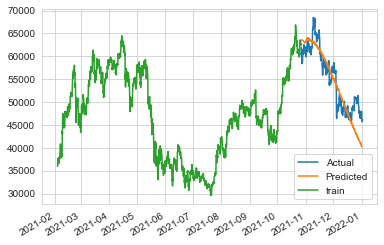

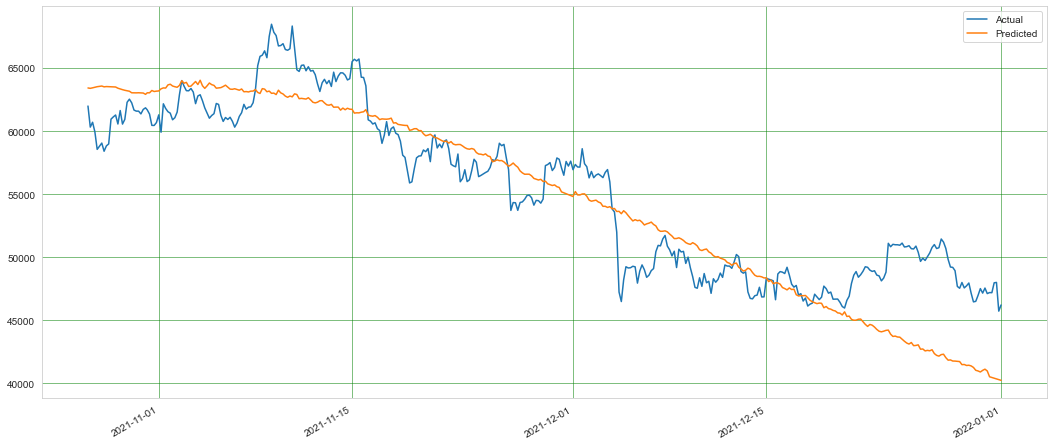

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [79]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [80]:
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [81]:
Model_R.best_params_

{'tol': 0.002, 'max_iter': 500, 'alpha': 3.0}

# Evaluation Measures on Test data

# MSE

In [82]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  83448641.8783
Wall time: 24.9 s


# MAE

In [83]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  7772.78678


# RMSE

In [84]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  9135.02282


# MAPE

In [85]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.15012


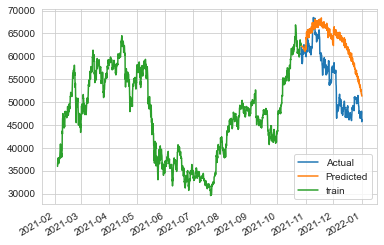

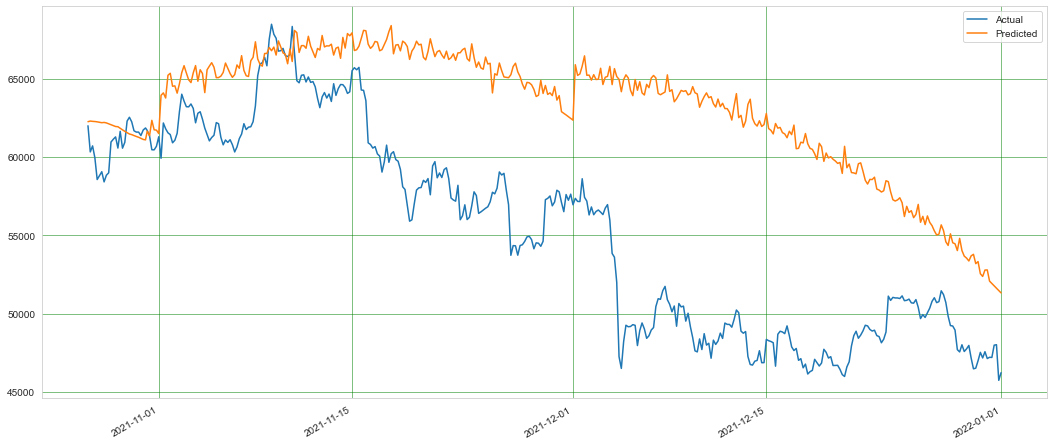

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [87]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [88]:
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [89]:
Model_R.best_params_

{'random_state': 10, 'min_samples_leaf': 20, 'max_depth': 40}

# Evaluation Measures on Test data

# MSE

In [90]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  36772109.54077
Wall time: 27.2 s


# MAE

In [91]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  5384.35593


# RMSE

In [92]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  6064.00112


# MAPE

In [93]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.09999


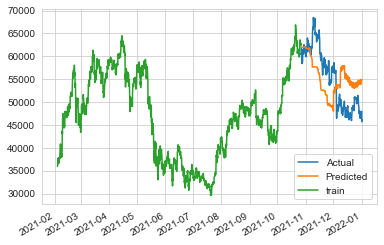

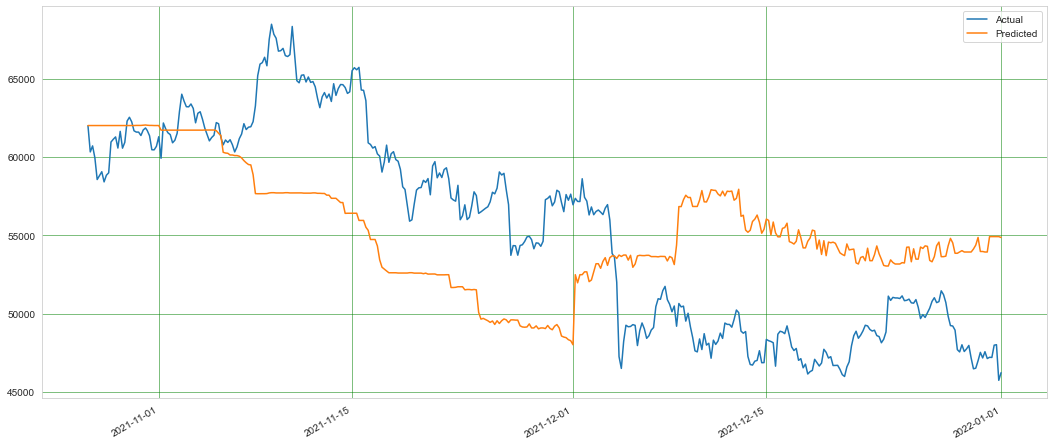

In [94]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [57]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [58]:
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [59]:
Model_R.best_params_

{'n_estimators': 100, 'max_depth': 40, 'learning_rate': 0.1, 'base_score': 0.1}

# Evaluation Measures on Test data

# MSE

In [60]:
%%time
y_pred_test=adjustDatasetPredict(Model_R) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  61563266.80811
Wall time: 39.8 s


# MAE

In [61]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  6715.795


# RMSE

In [62]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  7846.22628


# MAPE

In [63]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.12186


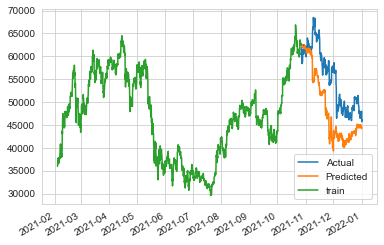

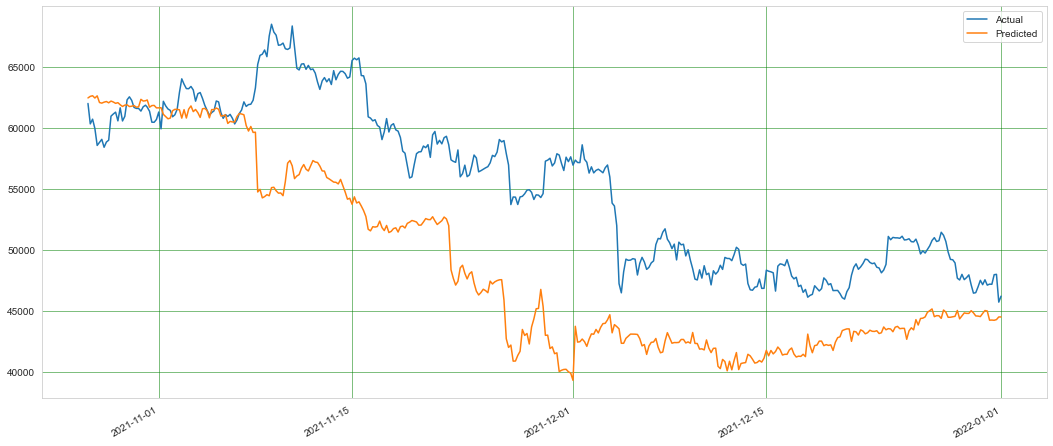

In [64]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [65]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 

print(x) # printing the table



Comparison of all algorithms


NameError: name 'test_mse1' is not defined

# Comparison of all algorithms Results on MAE score

In [ ]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 

print(x) # printing the table

# Comparison of all algorithms Results on RMSE score

In [ ]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 

# Comparison of all algorithms Results on MAPE score

In [ ]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 